# **For a start lets merge all poems files to one and clean up the text**

In [1]:
path = '/Users/kuprone/Desktop/test'

In [8]:
import os

Dir = "/Users/kuprone/Desktop/test"  # path to dir with poems

AllPath = [] 

for path in os.listdir(Dir):
    FilePath = os.path.join(Dir, path)
    if os.path.isfile(FilePath):
        AllPath.append(FilePath)

In [10]:
Output = '/Users/kuprone/Poems.txt' #path to output file

with open(Output, 'w') as outfile:
    for fname in AllPath:
        with open(fname) as infile:
            for line in infile:
                outfile.write(line)

In [236]:
f = open('/Users/kuprone/Poems.txt', "r", encoding="utf-8")
text = f.read()

In [237]:
text[10000:11000] #text sample

'ца женского я не постиг. \n\n\n\n\n\nОт гнева в печени, мечты во лбу,\nБогиня верности, храни рабу.\nЧугунным ободом скрепи ей грудь,\nБогиня Верности, покровом будь.\nВсе сладколичие сними с куста,\nКосноязычием скрепи уста…\nЗапечатленнее кости в гробу,\nБогиня Верности, храни рабу!\nДабы без устали шумел станок,\nДа будет уст ее закон — замок.\nДабы могильного поверх горба:\n«Единой Верности была раба!»\nНа раздорожии, ребром к столбу,\nБогиня Верности — распни рабу! \n\n\n\n\n\nЗаводь спит. Молчит вода зеркальная.\nТолько там, где дремлют камыши,\nЧья-то песня слышится, печальная,\nКак последний вздох души.\nЭто плачет лебедь умирающий,\nОн с своим прошедшим говорит,\nА на небе вечер догорающий\nИ горит и не горит.\nОтчего так грустны эти жалобы?\nОтчего так бьется эта грудь?\nВ этот миг душа его желала бы\nНевозвратное вернуть.\nВсе, чем жил с тревогой, с наслаждением,\nВсе, на что надеялась любовь,\nПроскользнуло быстрым сновидением,\nНикогда не вспыхнет вновь.\nВсе, на чем печа

In [238]:
len(text) #count of symbols

28509308

In [239]:
text = text.lower() # make text in lower reg
text = ''.join([ch if ch != '\n' else ' ' for ch in text])

In [240]:
import string
trash = string.punctuation + '\n\xa0«»\t—…'

In [241]:
text = "".join([ch for ch in text if ch not in trash]) # remove unwanted symbols

In [242]:
text[10000:11000] # looks fine

'камыши чьято песня слышится печальная как последний вздох души это плачет лебедь умирающий он с своим прошедшим говорит а на небе вечер догорающий и горит и не горит отчего так грустны эти жалобы отчего так бьется эта грудь в этот миг душа его желала бы невозвратное вернуть все чем жил с тревогой с наслаждением все на что надеялась любовь проскользнуло быстрым сновидением никогда не вспыхнет вновь все на чем печать непоправимого белый лебедь в этой песне слил точно он у озера родимого о прощении молил и когда блеснули звезды дальние и когда туман вставал в глуши лебедь пел все тише все печальнее и шептались камыши не живой он пел а умирающий оттого он пел в предсмертный час что пред смертью вечной примиряющей видел правду в первый раз       спать пора уснул бычок лёг в коробку на бочок сонный мишка лег в кровать только слон не хочет спать головой качает слон он слонихе шлет поклон       в свое сиреневое царство меня зовешь ты в петроград что это едкое коварство или и вправду ты мне ра

# Tokenize and analyze 

In [243]:
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords

In [244]:
tokens = word_tokenize(text)

In [245]:
len(tokens) # count of words 

4507423

In [246]:
tokens[0:20] # sample tokens

['волны',
 'и',
 'молодость',
 'вне',
 'закона',
 'тронулся',
 'дон',
 'погибаем',
 'тонем',
 'ветру',
 'веков',
 'доверяем',
 'снесть',
 'внукам',
 'лихую',
 'весть',
 'да',
 'проломилась',
 'донская',
 'глыба']

As you can see there's a lot of unnecessary words for analysis. So lets remove it 

In [247]:
Stopwords = stopwords.words("russian")
Stopwords.append('это')
Stopwords.append('–')
Stopwords.append('б')

In [248]:
newText = []
for token in tokens:
    if token not in Stopwords:
        newText.append(token)

In [249]:
newText[0:20] # looks great

['волны',
 'молодость',
 'вне',
 'закона',
 'тронулся',
 'дон',
 'погибаем',
 'тонем',
 'ветру',
 'веков',
 'доверяем',
 'снесть',
 'внукам',
 'лихую',
 'весть',
 'проломилась',
 'донская',
 'глыба',
 'белая',
 'гвардия']

Then we have to transform it to nltk format

In [250]:
nltktext = nltk.Text(newText)
freq = FreqDist(nltktext)

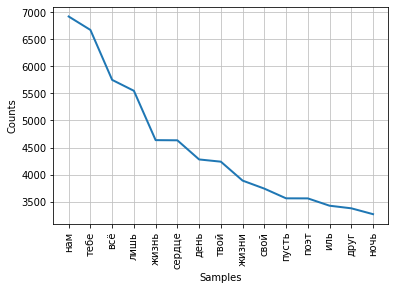

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [257]:
freq.plot(15) # plot of 15 most common words

There is a plot of 15 most common word.

# epilogue

You can also use other methods for a complete analysis. For example, the stemming. 

With my web-scapper i've got a more than a 4 millons words, which can be used for for training neural networks and other things.